In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
from IPython.display import display
from scripts.random_profiles import RandomProfileGenerator
from scripts.profile_reader2 import ProfileReader

pd.options.display.max_rows = 30
pd.options.display.max_columns = 300
%matplotlib inline


pr = ProfileReader(data_file='data\\Final_Berg JBS 2013 Supplemental Table 3_For SVM14Dec2017.xlsx',  
                       mechanism_file='data\\Final_Berg JBS 2013 Supplemental Table 3_For SVM14Dec2017 - Mechanisms.xlsx')

# read in data.`b
data = pr.get_profile(index=['mech', 'agent'])
mech = 'HDAC inhibitor'



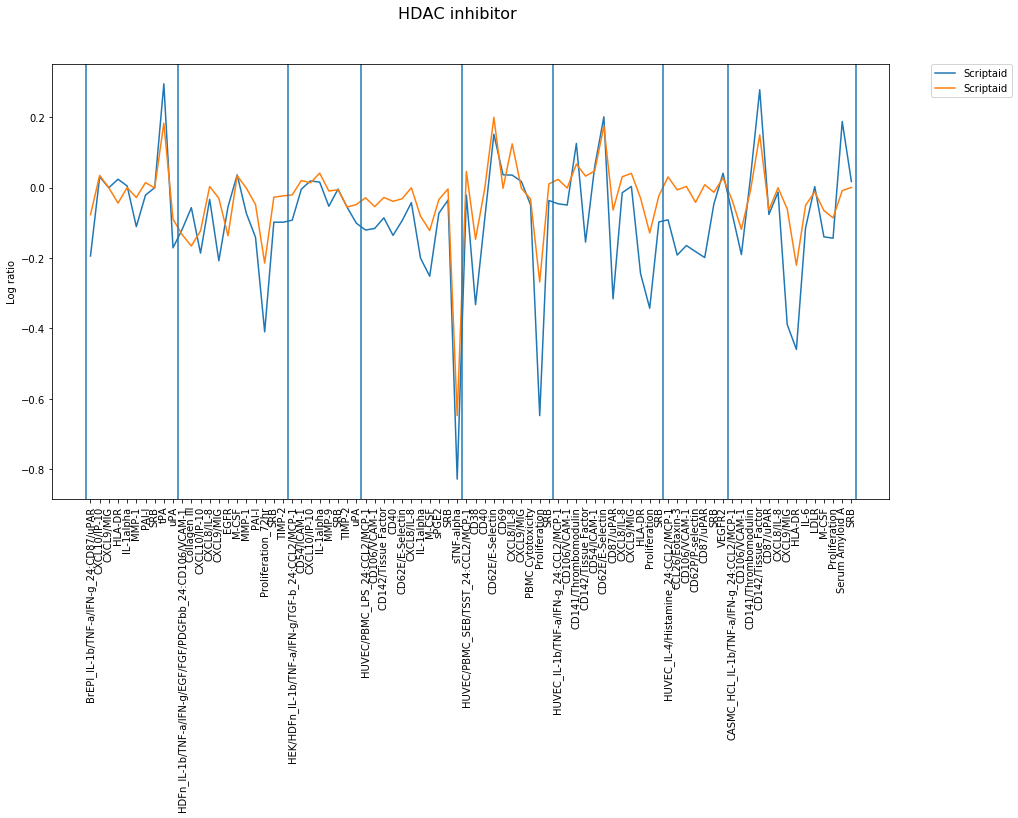

In [3]:
pr.plot(data=data.loc[mech], agents='Scriptaid', title=mech)

In [4]:
pr.get_system_markers()

Empty DataFrame
Columns: []
Index: [(BrEPI_IL-1b/TNF-a/IFN-g_24, CD87/uPAR), (BrEPI_IL-1b/TNF-a/IFN-g_24, CXCL10/IP-10), (BrEPI_IL-1b/TNF-a/IFN-g_24, CXCL9/MIG), (BrEPI_IL-1b/TNF-a/IFN-g_24, HLA-DR), (BrEPI_IL-1b/TNF-a/IFN-g_24, IL-1alpha), (BrEPI_IL-1b/TNF-a/IFN-g_24, MMP-1), (BrEPI_IL-1b/TNF-a/IFN-g_24, PAI-I), (BrEPI_IL-1b/TNF-a/IFN-g_24, SRB), (BrEPI_IL-1b/TNF-a/IFN-g_24, tPA), (BrEPI_IL-1b/TNF-a/IFN-g_24, uPA), (CASMC_HCL_IL-1b/TNF-a/IFN-g_24, CCL2/MCP-1), (CASMC_HCL_IL-1b/TNF-a/IFN-g_24, CD106/VCAM-1), (CASMC_HCL_IL-1b/TNF-a/IFN-g_24, CD141/Thrombomodulin), (CASMC_HCL_IL-1b/TNF-a/IFN-g_24, CD142/Tissue Factor), (CASMC_HCL_IL-1b/TNF-a/IFN-g_24, CD87/uPAR), (CASMC_HCL_IL-1b/TNF-a/IFN-g_24, CXCL8/IL-8), (CASMC_HCL_IL-1b/TNF-a/IFN-g_24, CXCL9/MIG), (CASMC_HCL_IL-1b/TNF-a/IFN-g_24, HLA-DR), (CASMC_HCL_IL-1b/TNF-a/IFN-g_24, IL-6), (CASMC_HCL_IL-1b/TNF-a/IFN-g_24, LDLR), (CASMC_HCL_IL-1b/TNF-a/IFN-g_24, M-CSF), (CASMC_HCL_IL-1b/TNF-a/IFN-g_24, Proliferation), (CASMC_HCL_IL-1b/TNF-a/IFN-g_24, SRB), (CASMC_HCL_IL-1b/TNF-a/IFN-g_24, Serum Amyloid A), (HDFn_IL-1b/TNF-a/IFN-g/EGF/FGF/PDGFbb_24, CD106/VCAM-1), (HDFn_IL-1b/TNF-a/IFN-g/EGF/FGF/PDGFbb_24, CXCL10/IP-10), (HDFn_IL-1b/TNF-a/IFN-g/EGF/FGF/PDGFbb_24, CXCL8/IL-8), (HDFn_IL-1b/TNF-a/IFN-g/EGF/FGF/PDGFbb_24, CXCL9/MIG), (HDFn_IL-1b/TNF-a/IFN-g/EGF/FGF/PDGFbb_24, Collagen III), (HDFn_IL-1b/TNF-a/IFN-g/EGF/FGF/PDGFbb_24, EGFR), (HDFn_IL-1b/TNF-a/IFN-g/EGF/FGF/PDGFbb_24, M-CSF), (HDFn_IL-1b/TNF-a/IFN-g/EGF/FGF/PDGFbb_24, MMP-1), (HDFn_IL-1b/TNF-a/IFN-g/EGF/FGF/PDGFbb_24, PAI-I), (HDFn_IL-1b/TNF-a/IFN-g/EGF/FGF/PDGFbb_24, Proliferation_72hr), (HDFn_IL-1b/TNF-a/IFN-g/EGF/FGF/PDGFbb_24, SRB), (HDFn_IL-1b/TNF-a/IFN-g/EGF/FGF/PDGFbb_24, TIMP-2), (HEK/HDFn_IL-1b/TNF-a/IFN-g/TGF-b_24, CCL2/MCP-1), (HEK/HDFn_IL-1b/TNF-a/IFN-g/TGF-b_24, CD54/ICAM-1), (HEK/HDFn_IL-1b/TNF-a/IFN-g/TGF-b_24, CXCL10/IP-10), (HEK/HDFn_IL-1b/TNF-a/IFN-g/TGF-b_24, IL-1alpha), (HEK/HDFn_IL-1b/TNF-a/IFN-g/TGF-b_24, MMP-9), (HEK/HDFn_IL-1b/TNF-a/IFN-g/TGF-b_24, SRB), (HEK/HDFn_IL-1b/TNF-a/IFN-g/TGF-b_24, TIMP-2), (HEK/HDFn_IL-1b/TNF-a/IFN-g/TGF-b_24, uPA), (HUVEC/PBMC_LPS_24, CCL2/MCP-1), (HUVEC/PBMC_LPS_24, CD106/VCAM-1), (HUVEC/PBMC_LPS_24, CD142/Tissue Factor), (HUVEC/PBMC_LPS_24, CD40), (HUVEC/PBMC_LPS_24, CD62E/E-Selectin), (HUVEC/PBMC_LPS_24, CXCL8/IL-8), (HUVEC/PBMC_LPS_24, IL-1alpha), (HUVEC/PBMC_LPS_24, M-CSF), (HUVEC/PBMC_LPS_24, SRB), (HUVEC/PBMC_LPS_24, sPGE2), (HUVEC/PBMC_LPS_24, sTNF-alpha), (HUVEC/PBMC_SEB/TSST_24, CCL2/MCP-1), (HUVEC/PBMC_SEB/TSST_24, CD38), (HUVEC/PBMC_SEB/TSST_24, CD40), (HUVEC/PBMC_SEB/TSST_24, CD62E/E-Selectin), (HUVEC/PBMC_SEB/TSST_24, CD69), (HUVEC/PBMC_SEB/TSST_24, CXCL8/IL-8), (HUVEC/PBMC_SEB/TSST_24, CXCL9/MIG), (HUVEC/PBMC_SEB/TSST_24, PBMC Cytotoxicity), (HUVEC/PBMC_SEB/TSST_24, Proliferation), (HUVEC/PBMC_SEB/TSST_24, SRB), (HUVEC_IL-1b/TNF-a/IFN-g_24, CCL2/MCP-1), (HUVEC_IL-1b/TNF-a/IFN-g_24, CD106/VCAM-1), (HUVEC_IL-1b/TNF-a/IFN-g_24, CD141/Thrombomodulin), (HUVEC_IL-1b/TNF-a/IFN-g_24, CD142/Tissue Factor), (HUVEC_IL-1b/TNF-a/IFN-g_24, CD54/ICAM-1), (HUVEC_IL-1b/TNF-a/IFN-g_24, CD62E/E-Selectin), (HUVEC_IL-1b/TNF-a/IFN-g_24, CD87/uPAR), (HUVEC_IL-1b/TNF-a/IFN-g_24, CXCL8/IL-8), (HUVEC_IL-1b/TNF-a/IFN-g_24, CXCL9/MIG), (HUVEC_IL-1b/TNF-a/IFN-g_24, HLA-DR), (HUVEC_IL-1b/TNF-a/IFN-g_24, Proliferation), (HUVEC_IL-1b/TNF-a/IFN-g_24, SRB), (HUVEC_IL-4/Histamine_24, CCL2/MCP-1), (HUVEC_IL-4/Histamine_24, CCL26/Eotaxin-3), (HUVEC_IL-4/Histamine_24, CD106/VCAM-1), (HUVEC_IL-4/Histamine_24, CD62P/P-selectin), (HUVEC_IL-4/Histamine_24, CD87/uPAR), (HUVEC_IL-4/Histamine_24, SRB), (HUVEC_IL-4/Histamine_24, VEGFR2)]

[84 rows x 0 columns]

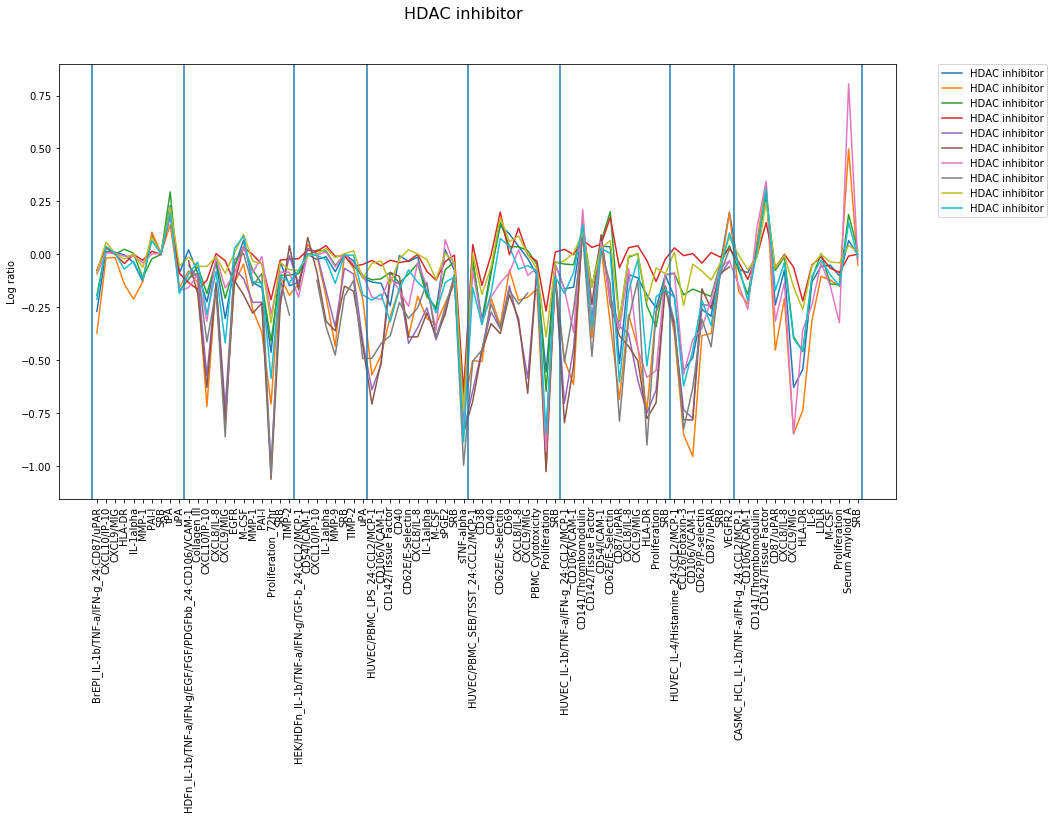

In [51]:
import matplotlib.pyplot as plt
ax = data.loc[mech].T.plot(
    figsize=(15,8),
    sharey=True,
    subplots=False);

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
x, x_labels, v_line_positions = pr.v_line_positions(data.loc[mech].columns.values);
plt.xticks(x, x_labels, rotation='vertical');
plt.ylabel('Log ratio');
plt.suptitle(mech, fontsize = 16)
# add vertical lines
for lp in v_line_positions:
    plt.axvline(x=lp-0.5)
plt.show()